<a href="https://colab.research.google.com/github/nasthosh/image-segmentation/blob/main/image_blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from PIL import ImageChops
from google.colab import files

In [3]:
upload_data = files.upload()

Saving pexels-photo-1319515.jpeg to pexels-photo-1319515.jpeg


1000 1500


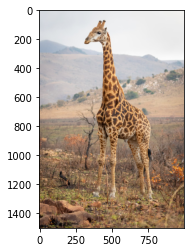

In [4]:
#open Image content
original_img = Image.open("/content/pexels-photo-1319515.jpeg")
imshow(original_img)

#Get the Pixel Data
#pixels = list(original_img.getdata())
pixels = original_img.load()
width, height = original_img.size

print(width, height)
print(pixels)

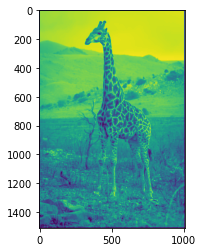

In [5]:
def pad_image( image, pad):
    width, height = image.size
    width = width + pad * 2
    height = height + pad * 2
    padded_image = Image.new('L', (width, height))
    padded_image.paste(image, (pad, pad))
    return padded_image

def image_filter( image, filterData, padSize, width, height):
    pad_width, pad_height = image.size[1],image.size[0] 
    shift=int((padSize-1)/2)
    pixels=np.array(image.getdata()).reshape(pad_width, pad_height)

    newImage=Image.new('L', (width, height))
    newPixels=newImage.load()
    for i in range(padSize, height+padSize):
        for j in range(padSize, width+padSize):
            conv_data = pixels[i-shift:i+shift+1,j-shift:j+shift+1]
            #print(conv_data.shape, filterData.shape)
            masked_data =np.dot(filterData.flatten(), conv_data.flatten())
            newPixels[j-padSize,i-padSize]=int(masked_data)
    return newImage 


# ## Padding Extra Field in Image


padded_img = pad_image( original_img, 5)
imshow(padded_img)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

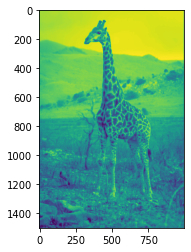

In [7]:
# ## Average Filter


filterDim = 5
filterSize = filterDim ** 2

#Creating Average Filter Data
avg_filter = np.array([1/filterSize]*filterSize)
avg_filter.shape = (filterDim,filterDim)
avgFilteredImg=image_filter( padded_img, avg_filter, filterDim, width, height)
imshow(avgFilteredImg)
avgFilteredImg.save("AverageFilter.png")
files.download("AverageFilter.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

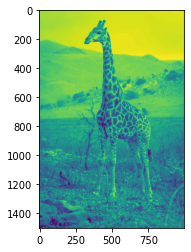

In [8]:
# ## Gaussian Filter


#Creating Gaussian Filter Data
gaussian_filter = np.array([1,4,7,4,1,4,16,26,16,4,7,26,41,26,7,4,16,26,16,4,1,4,7,4,1])/273
gaussian_filter.shape = (filterDim,filterDim)

gaussianFilteredImg=image_filter( padded_img, gaussian_filter, filterDim, width, height)
imshow(gaussianFilteredImg)
gaussianFilteredImg.save("GaussianFilter.png")
files.download("GaussianFilter.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

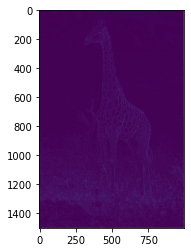

In [9]:
# ## 2.	Image sharpening 

original_img = original_img.convert('L')

unSharpMask=ImageChops.subtract(original_img,gaussianFilteredImg)
imshow(unSharpMask)
unSharpMask.save("UnSharpMask.png")
files.download("UnSharpMask.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

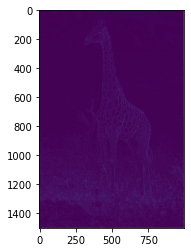

In [11]:
# #### Weighted Mask


weight=2
weightedMask=unSharpMask.point(lambda i:weight*i)
imshow(weightedMask)
weightedMask.save("WeightedMask.png")
files.download("WeightedMask.png")